In [1]:
import numpy as np
from scipy import interpolate
from scipy.interpolate import RegularGridInterpolator
from scipy.integrate import odeint
from scipy.optimize import brentq
import matplotlib.pyplot as plt
from scipy import interpolate
plt.rc('text', usetex=True)
plt.rc('font', family='calibri')

In [2]:
dataKerr=np.loadtxt('sol_alpha000000_beta100000_tol006_it-3_rH100_chi000_n061_m31.dat')

In [3]:
a0=0.0
xgrid=61
ygrid=31

In [4]:
def F1(x,theta,a0,rh):
    m0=2*rh/np.sqrt(1-a0**2)
    f1=(1-(1-x)**2)**2
    f2=2*m0*(1+(1-x)**2)*(1-x)/rh
    f3=2*m0**2*(1-x)**2/rh**2
    f4=(m0**2-4*rh**2)*(1-x)**2*np.sin(theta)**2/rh**2
    return f1+f2+f3-f4
def F2(x,theta,a0,rh):
    m0=2*rh/np.sqrt(1-a0**2)
    f1=2*m0**2*(1-x)**2+rh**2*(2-x)**2*x**2-2*m0*rh*(-2+4*x-3*x**2+x**3)
    f2=rh**2*(-1*m0**2+4*rh**2)*(2-x)**2*(-1+x)**2*x**2*np.sin(theta)**2
    return (f1**2+f2)/rh**4

def F3(x,theta,a0,rh):
    m0=2*rh/np.sqrt(1-a0**2)
    f1=-2*m0*np.sqrt(m0**2-4*rh**2)*(1-x)**2*(m0*(x-1)-rh*(2-2*x+x**2))
    return f1/rh**3

def FGRbar(x,theta,a0,rh):
    return (x-2)**2*F1(x,theta,a0,rh)/F2(x,theta,a0,rh)

def MGRbar(x,theta,a0,rh):
    return (x-2)**2*F1(x,theta,a0,rh)**2/F2(x,theta,a0,rh)

def LGRbar(x,theta,a0,rh):
    return (x-2)**2

def WGRbar(x,theta,a0,rh):
    return F3(x,theta,a0,rh)/F2(x,theta,a0,rh)

In [5]:
fnumber=2
mnumber=6
lnumber=10
wnumber=14

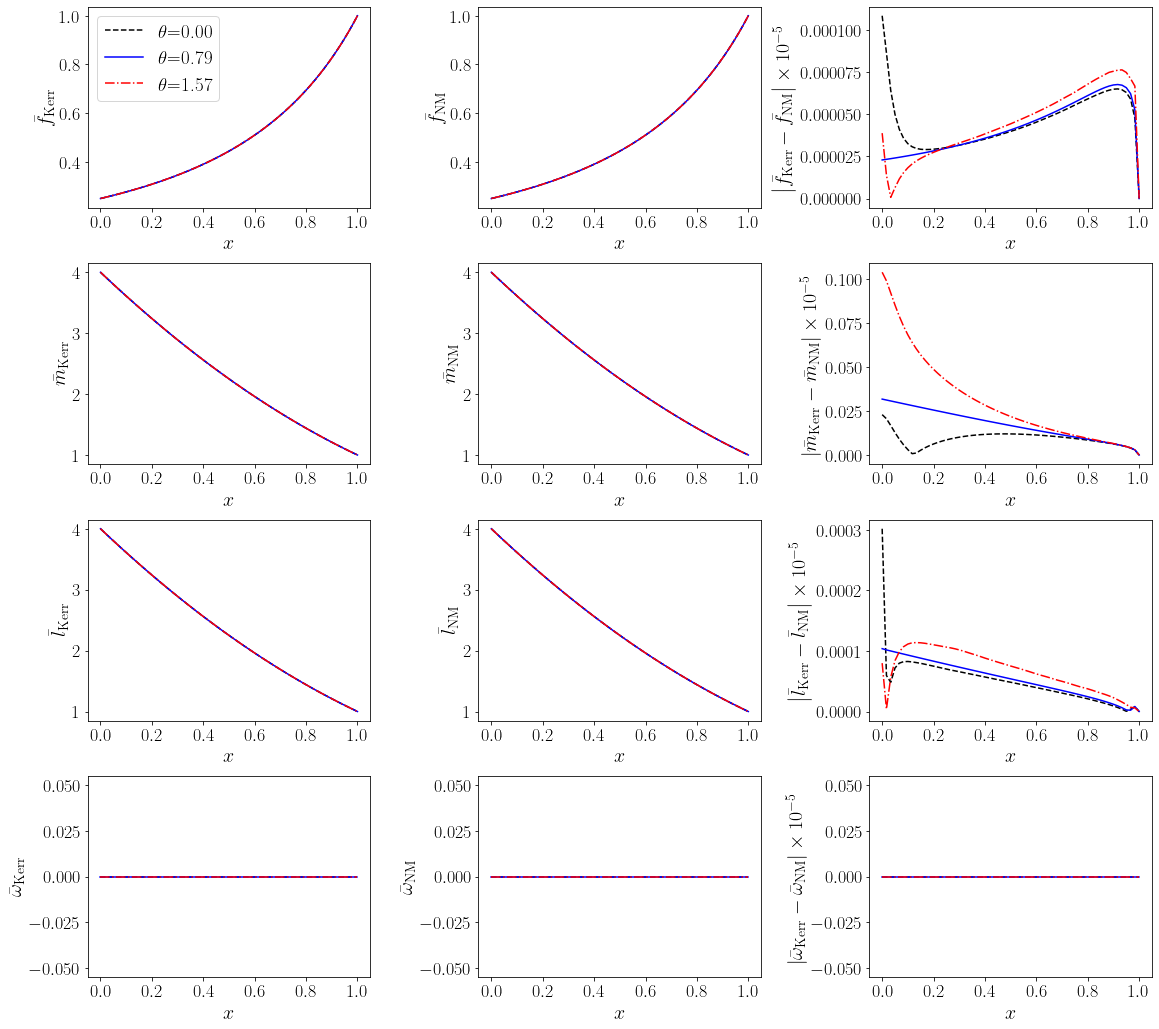

In [6]:
fig=plt.figure(figsize=(5.4*3,3.6*4))
fig.subplots_adjust(hspace=0.04) 
fig.subplots_adjust(wspace=0.3) 
############################################################################################
ax=plt.subplot(431) 
number=0
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[FGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
plt.plot(dataKerr[xbegin:xend,0],dataGR,'black',ls='--',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid//2
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[FGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
plt.plot(dataKerr[xbegin:xend,0],dataGR,'blue',ls='-',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid-1
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[FGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
plt.plot(dataKerr[xbegin:xend,0],dataGR,'red',ls='-.',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=18)
plt.ylabel(r'$\bar{f}_{\rm Kerr}$',fontsize=20)
plt.xlabel(r'$x$',fontsize=20)
plt.legend(loc='upper left',fontsize=19)
############################################################################################
ax=plt.subplot(432) 
number=0
xbegin=int(xgrid*number)
xend=xbegin+xgrid
plt.plot(dataKerr[xbegin:xend,0],dataKerr[xbegin:xend,fnumber],'black',ls='--',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid//2
xbegin=int(xgrid*number)
xend=xbegin+xgrid
plt.plot(dataKerr[xbegin:xend,0],dataKerr[xbegin:xend,fnumber],'blue',ls='-',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid-1
xbegin=int(xgrid*number)
xend=xbegin+xgrid
plt.plot(dataKerr[xbegin:xend,0],dataKerr[xbegin:xend,fnumber],'red',ls='-.',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))
plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=18)
plt.ylabel(r'$\bar{f}_{\rm NM}$',fontsize=20)
plt.xlabel(r'$x$',fontsize=20)
# plt.legend(loc='lower left',fontsize=19)

############################################################################################
ax=plt.subplot(433) 
number=0
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[FGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
error=abs(np.array(dataGR)-dataKerr[xbegin:xend,fnumber])/1e-5
plt.plot(dataKerr[xbegin:xend,0],error,'black',ls='--',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid//2
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[FGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
error=abs(np.array(dataGR)-dataKerr[xbegin:xend,fnumber])/1e-5
plt.plot(dataKerr[xbegin:xend,0],error,'blue',ls='-',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid-1
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[FGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
error=abs(np.array(dataGR)-dataKerr[xbegin:xend,fnumber])/1e-5
plt.plot(dataKerr[xbegin:xend,0],error,'red',ls='-.',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=18)
plt.ylabel(r'$\left|\bar{f}_{\rm Kerr}-\bar{f}_{\rm NM}\right|\times 10^{-5}$',fontsize=20) 
plt.xlabel(r'$x$',fontsize=20)
# plt.legend(loc='lower left',fontsize=19)



#2222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222#
ax=plt.subplot(434) 
number=0
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[MGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
plt.plot(dataKerr[xbegin:xend,0],dataGR,'black',ls='--',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid//2
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[MGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
plt.plot(dataKerr[xbegin:xend,0],dataGR,'blue',ls='-',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid-1
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[MGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
plt.plot(dataKerr[xbegin:xend,0],dataGR,'red',ls='-.',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))
plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=18)
plt.ylabel(r'$\bar{m}_{\rm Kerr}$',fontsize=20)
plt.xlabel(r'$x$',fontsize=20)
# plt.legend(loc='upper left',fontsize=19)
############################################################################################
ax=plt.subplot(435) 
number=0
xbegin=int(xgrid*number)
xend=xbegin+xgrid
plt.plot(dataKerr[xbegin:xend,0],dataKerr[xbegin:xend,mnumber],'black',ls='--',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid//2
xbegin=int(xgrid*number)
xend=xbegin+xgrid
plt.plot(dataKerr[xbegin:xend,0],dataKerr[xbegin:xend,mnumber],'blue',ls='-',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid-1
xbegin=int(xgrid*number)
xend=xbegin+xgrid
plt.plot(dataKerr[xbegin:xend,0],dataKerr[xbegin:xend,mnumber],'red',ls='-.',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))
plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=18)
plt.ylabel(r'$\bar{m}_{\rm NM}$',fontsize=20)
plt.xlabel(r'$x$',fontsize=20)
# plt.legend(loc='lower left',fontsize=19)

############################################################################################
ax=plt.subplot(436) 
number=0
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[MGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
error=abs(np.array(dataGR)-dataKerr[xbegin:xend,mnumber])/1e-5
plt.plot(dataKerr[xbegin:xend,0],error,'black',ls='--',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid//2
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[MGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
error=abs(np.array(dataGR)-dataKerr[xbegin:xend,mnumber])/1e-5
plt.plot(dataKerr[xbegin:xend,0],error,'blue',ls='-',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid-1
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[MGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
error=abs(np.array(dataGR)-dataKerr[xbegin:xend,mnumber])/1e-5
plt.plot(dataKerr[xbegin:xend,0],error,'red',ls='-.',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=18)
plt.ylabel(r'$\left|\bar{m}_{\rm Kerr}-\bar{m}_{\rm NM}\right|\times 10^{-5}$',fontsize=20) 
plt.xlabel(r'$x$',fontsize=20)
# plt.legend(loc='lower left',fontsize=19)


#33333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333#
ax=plt.subplot(437) 
number=0
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[LGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
plt.plot(dataKerr[xbegin:xend,0],dataGR,'black',ls='--',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid//2
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[LGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
plt.plot(dataKerr[xbegin:xend,0],dataGR,'blue',ls='-',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid-1
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[LGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
plt.plot(dataKerr[xbegin:xend,0],dataGR,'red',ls='-.',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=18)
plt.ylabel(r'$\bar{l}_{\rm Kerr}$',fontsize=20)
plt.xlabel(r'$x$',fontsize=20)
# plt.legend(loc='upper left',fontsize=19)
############################################################################################
ax=plt.subplot(438) 
number=0
xbegin=int(xgrid*number)
xend=xbegin+xgrid
plt.plot(dataKerr[xbegin:xend,0],dataKerr[xbegin:xend,lnumber],'black',ls='--',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid//2
xbegin=int(xgrid*number)
xend=xbegin+xgrid
plt.plot(dataKerr[xbegin:xend,0],dataKerr[xbegin:xend,lnumber],'blue',ls='-',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid-1
xbegin=int(xgrid*number)
xend=xbegin+xgrid
plt.plot(dataKerr[xbegin:xend,0],dataKerr[xbegin:xend,lnumber],'red',ls='-.',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=18)
plt.ylabel(r'$\bar{l}_{\rm NM}$',fontsize=20)
plt.xlabel(r'$x$',fontsize=20)
# plt.legend(loc='lower left',fontsize=19)

############################################################################################
ax=plt.subplot(439) 
number=0
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[LGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
error=abs(np.array(dataGR)-dataKerr[xbegin:xend,lnumber])/1e-5
plt.plot(dataKerr[xbegin:xend,0],error,'black',ls='--',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid//2
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[LGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
error=abs(np.array(dataGR)-dataKerr[xbegin:xend,lnumber])/1e-5
plt.plot(dataKerr[xbegin:xend,0],error,'blue',ls='-',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid-1
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[LGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
error=abs(np.array(dataGR)-dataKerr[xbegin:xend,lnumber])/1e-5
plt.plot(dataKerr[xbegin:xend,0],error,'red',ls='-.',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=18)
plt.ylabel(r'$\left|\bar{l}_{\rm Kerr}-\bar{l}_{\rm NM}\right|\times 10^{-5}$',fontsize=20) 
plt.xlabel(r'$x$',fontsize=20)
# plt.legend(loc='lower left',fontsize=19)

#444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444#
ax=plt.subplot(4,3,10) 
number=0
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[WGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
plt.plot(dataKerr[xbegin:xend,0],dataGR,'black',ls='--',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid//2
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[WGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
plt.plot(dataKerr[xbegin:xend,0],dataGR,'blue',ls='-',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid-1
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[WGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
plt.plot(dataKerr[xbegin:xend,0],dataGR,'red',ls='-.',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))
plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=18)
plt.ylabel(r'$\bar{\omega}_{\rm Kerr}$',fontsize=20)
plt.xlabel(r'$x$',fontsize=20)
# plt.legend(loc='upper left',fontsize=19)
############################################################################################
ax=plt.subplot(4,3,11) 
number=0
xbegin=int(xgrid*number)
xend=xbegin+xgrid
plt.plot(dataKerr[xbegin:xend,0],dataKerr[xbegin:xend,wnumber],'black',ls='--',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid//2
xbegin=int(xgrid*number)
xend=xbegin+xgrid
plt.plot(dataKerr[xbegin:xend,0],dataKerr[xbegin:xend,wnumber],'blue',ls='-',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid-1
xbegin=int(xgrid*number)
xend=xbegin+xgrid
plt.plot(dataKerr[xbegin:xend,0],dataKerr[xbegin:xend,wnumber],'red',ls='-.',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=18)
plt.ylabel(r'$\bar{\omega}_{\rm NM}$',fontsize=20)
plt.xlabel(r'$x$',fontsize=20)
# plt.legend(loc='lower left',fontsize=19)

############################################################################################
ax=plt.subplot(4,3,12) 
number=0
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[WGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
error=abs(np.array(dataGR)-dataKerr[xbegin:xend,wnumber])/1e-5
plt.plot(dataKerr[xbegin:xend,0],error,'black',ls='--',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid//2
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[WGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
error=abs(np.array(dataGR)-dataKerr[xbegin:xend,wnumber])/1e-5
plt.plot(dataKerr[xbegin:xend,0],error,'blue',ls='-',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid-1
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[WGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
error=abs(np.array(dataGR)-dataKerr[xbegin:xend,wnumber])/1e-5
plt.plot(dataKerr[xbegin:xend,0],error,'red',ls='-.',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

# plt.yscale('log')
plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=18)
plt.ylabel(r'$\left|\bar{\omega}_{\rm Kerr}-\bar{\omega}_{\rm NM}\right|\times 10^{-5}$',fontsize=20) 
plt.xlabel(r'$x$',fontsize=20)
# plt.legend(loc='lower left',fontsize=19)
plt.tight_layout()
plt.savefig('SSBvsNM_DMcode.pdf')
plt.savefig('SSBvsNM_DMcode.jpg')
plt.show()